In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os 

import pandas as pd

In [2]:
# Define stats file paths
balle_psnr_stats_path = "/scratch/gf332/data/bmshj2018/mse/stats.json"
balle_ssim_stats_path = "/scratch/gf332/data/bmshj2018/msssim/stats.json"

jpeg_stats_path = "/scratch/gf332/data/jpeg/stats.json"
#jpeg2k_path = "/scratch/gf332/data/jpeg2k"
bpg_stats_path = "/scratch/gf332/data/bpg/stats.json"

balle_clic_stats_path = "/scratch/gf332/data/kodak_balle/stats.json"

# This one is special
miracle_stats_path = "/scratch/gf332/data/kodak_miracle/stats.json"
cwoq_stats_path = "/scratch/gf332/data/kodak_cwoq/stats.json"

pln_regex = "^pln[_\d]*(?!ssim)$"
theo_pln_regex = "^theoretical_pln[_\d]*(?!ssim)$"
theo_pln_exclude = ["theoretical_pln_128_24_150"]

pln_ssim_regex = "^pln[_\d]*ssim$"
theo_pln_ssim_regex = "^theoretical_pln[_\d]*ssim$"

pln_mse_regex = "^pln[_\d]*mse$"
theo_pln_mse_regex = "^theoretical_pln[_\d]*mse$"

ladder_regex = "^ladder[_\d]*(?!gamma)$"
theo_ladder_regex = "^theoretical_ladder[_\d]*(?!gamma)$"

gamma_regex = "^ladder.*gamma$"
theo_gamma_regex = "^theoretical.*gamma$"

balle_psnr_stats = pd.read_json(balle_psnr_stats_path)
balle_ssim_stats = pd.read_json(balle_ssim_stats_path)
jpeg_stats = pd.read_json(jpeg_stats_path)
bpg_stats = pd.read_json(bpg_stats_path)

balle_clic_stats = pd.read_json(balle_clic_stats_path)

miracle_stats = pd.read_json(miracle_stats_path)
cwoq_stats = pd.read_json(cwoq_stats_path)

In [3]:
t = pd.read_json(cwoq_stats["/kodim05.png"].to_json()).transpose()
t = t.drop(theo_pln_exclude, axis="index")
lad = t.filter(regex=theo_pln_regex, axis="index")

t

,actual_byte_size,actual_no_extra,bpp,decoding_time,encoding_time,extra_byte_size,image_shape,ms_ssim,psnr,second_bpp,theoretical_byte_size,total_time
pln_128_24_1200,29292,28206,0.595947,43.2182,86.7417,1086,"[1, 512, 768, 3]",0.947522,25.2855,0.0380554,27580.3,129.96
pln_128_24_2400,17190,16481,0.349731,41.9227,80.7141,709,"[1, 512, 768, 3]",0.899714,23.0324,0.0321248,16003.2,122.637
pln_128_24_4800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pln_128_24_600,41578,40116,0.845907,48.974,101.868,1462,"[1, 512, 768, 3]",0.965019,26.6279,0.0429382,39458.4,150.842
theoretical_pln_128_128_1200_mse,NaN,NaN,0.0846211,-1,-1,NaN,NaN,0.834742,21.8641,NaN,NaN,-2
theoretical_pln_128_24_1200,NaN,NaN,0.553029,-1,-1,NaN,NaN,0.971422,28.0288,NaN,NaN,-2
theoretical_pln_128_24_1200_ssim,NaN,NaN,0.76438,-1,-1,NaN,NaN,0.985308,26.4881,NaN,NaN,-2
theoretical_pln_128_24_2400,NaN,NaN,0.318313,-1,-1,NaN,NaN,0.941767,25.3633,NaN,NaN,-2
theoretical_pln_128_24_300,NaN,NaN,1.17675,-1,-1,NaN,NaN,0.989043,31.0025,NaN,NaN,-2
theoretical_pln_128_24_4800,NaN,NaN,0.172323,-1,-1,NaN,NaN,0.908132,23.5209,NaN,NaN,-2


In [4]:
balle_clic_stats

,/kodim01.png,/kodim02.png,/kodim03.png,/kodim04.png,/kodim05.png,/kodim06.png,/kodim07.png,/kodim08.png,/kodim09.png,/kodim10.png,...,/kodim15.png,/kodim16.png,/kodim17.png,/kodim18.png,/kodim19.png,/kodim20.png,/kodim21.png,/kodim22.png,/kodim23.png,/kodim24.png
hyperprior_0001,"{'ms_ssim': 0.8758412003517151, 'theoretical_b...","{'ms_ssim': 0.867253601551055, 'theoretical_by...","{'ms_ssim': 0.92039555311203, 'theoretical_byt...","{'ms_ssim': 0.870124995708465, 'theoretical_by...","{'ms_ssim': 0.8948044776916501, 'theoretical_b...","{'ms_ssim': 0.8509084582328791, 'theoretical_b...","{'ms_ssim': 0.9347345232963561, 'theoretical_b...","{'ms_ssim': 0.9250494837760921, 'theoretical_b...","{'ms_ssim': 0.9323260784149171, 'theoretical_b...","{'ms_ssim': 0.9056096076965331, 'theoretical_b...",...,"{'ms_ssim': 0.916608035564422, 'theoretical_by...","{'ms_ssim': 0.856758415699005, 'theoretical_by...","{'ms_ssim': 0.9023941159248351, 'theoretical_b...","{'ms_ssim': 0.8429294228553771, 'theoretical_b...","{'ms_ssim': 0.878084242343902, 'theoretical_by...","{'ms_ssim': 0.930361032485961, 'theoretical_by...","{'ms_ssim': 0.9130615592002861, 'theoretical_b...","{'ms_ssim': 0.8357057571411131, 'theoretical_b...","{'ms_ssim': 0.9247305989265441, 'theoretical_b...","{'ms_ssim': 0.8713961243629451, 'theoretical_b..."
hyperprior_0003,"{'ms_ssim': 0.937865078449249, 'theoretical_by...","{'ms_ssim': 0.906385004520416, 'theoretical_by...","{'ms_ssim': 0.9523653388023371, 'theoretical_b...","{'ms_ssim': 0.9186183810234071, 'theoretical_b...","{'ms_ssim': 0.9474608302116391, 'theoretical_b...","{'ms_ssim': 0.9226282238960261, 'theoretical_b...","{'ms_ssim': 0.964895904064178, 'theoretical_by...","{'ms_ssim': 0.9576095938682551, 'theoretical_b...","{'ms_ssim': 0.9619641304016111, 'theoretical_b...","{'ms_ssim': 0.9468967318534851, 'theoretical_b...",...,"{'ms_ssim': 0.9447085261344911, 'theoretical_b...","{'ms_ssim': 0.9215202331542961, 'theoretical_b...","{'ms_ssim': 0.9434238076210021, 'theoretical_b...","{'ms_ssim': 0.919402599334716, 'theoretical_by...","{'ms_ssim': 0.924690186977386, 'theoretical_by...","{'ms_ssim': 0.9548810124397271, 'theoretical_b...","{'ms_ssim': 0.951084911823272, 'theoretical_by...","{'ms_ssim': 0.89980673789978, 'theoretical_byt...","{'ms_ssim': 0.9540804028511041, 'theoretical_b...","{'ms_ssim': 0.932668924331665, 'theoretical_by..."
hyperprior_001,"{'ms_ssim': 0.976289927959442, 'theoretical_by...","{'ms_ssim': 0.9467303156852721, 'theoretical_b...","{'ms_ssim': 0.975543022155761, 'theoretical_by...","{'ms_ssim': 0.9600119590759271, 'theoretical_b...","{'ms_ssim': 0.9785607457160951, 'theoretical_b...","{'ms_ssim': 0.967656195163726, 'theoretical_by...","{'ms_ssim': 0.9835357069969171, 'theoretical_b...","{'ms_ssim': 0.9800122380256651, 'theoretical_b...","{'ms_ssim': 0.979535639286041, 'theoretical_by...","{'ms_ssim': 0.97282463312149, 'theoretical_byt...",...,"{'ms_ssim': 0.96935349702835, 'theoretical_byt...","{'ms_ssim': 0.965419590473175, 'theoretical_by...","{'ms_ssim': 0.9724432826042171, 'theoretical_b...","{'ms_ssim': 0.9653220176696771, 'theoretical_b...","{'ms_ssim': 0.9675166010856621, 'theoretical_b...","{'ms_ssim': 0.9788877964019771, 'theoretical_b...","{'ms_ssim': 0.975518763065338, 'theoretical_by...","{'ms_ssim': 0.9549184441566461, 'theoretical_b...","{'ms_ssim': 0.9755483269691461, 'theoretical_b...","{'ms_ssim': 0.972255766391754, 'theoretical_by..."
hyperprior_003,"{'ms_ssim': 0.9895914196968071, 'theoretical_b...","{'ms_ssim': 0.9737686514854431, 'theoretical_b...","{'ms_ssim': 0.987006843090057, 'theoretical_by...","{'ms_ssim': 0.9810038208961481, 'theoretical_b...","{'ms_ssim': 0.9905169010162351, 'theoretical_b...","{'ms_ssim': 0.9854373335838311, 'theoretical_b...","{'ms_ssim': 0.9914968609809871, 'theoretical_b...","{'ms_ssim': 0.9901384711265561, 'theoretical_b...","{'ms_ssim': 0.9869694709777831, 'theoretical_b...","{'ms_ssim': 0.9852965474128721, 'theoretical_b...",...,"{'ms_ssim': 0.98

In [6]:
kodak_image_size = 768 * 512

def gen_plots(which, 
              show=False, 
              kodak_im_format="kodim{:02d}",
              comparison_plot_dir="/homes/gf332/compression-without-quantization/plots/kodak_comparison/",
              coding_time_plot_dir="/homes/gf332/compression-without-quantization/plots/kodak_coding_time/",
              side_info_plot_dir="/homes/gf332/compression-without-quantization/plots/kodak_side_info/",
              n_images=24,
              side_by_side=False,
              print_table=False,
              label_fontsize=14,
              title_fontsize=18,
              legend_fontsize=12):
    
    ssim_to_db = lambda ssim: -10 * np.log(1 - ssim) / np.log(10)

    # the columns of miracle_stats are the Kodak images
    for idx, (mir_image, cwoq_image, balle_image) in enumerate(zip(miracle_stats, cwoq_stats, balle_clic_stats)):

        miracle_im_stats = pd.read_json(miracle_stats[mir_image].to_json()).transpose()
        cwoq_im_stats = pd.read_json(cwoq_stats[cwoq_image].to_json()).transpose()
        balle_im_stats = pd.read_json(balle_clic_stats[balle_image].to_json()).transpose()

        # Dissertation stats
        miracle_ladder_stats = miracle_im_stats.filter(regex=ladder_regex, axis="index")
        miracle_theo_ladder_stats = miracle_im_stats.filter(regex=theo_ladder_regex, axis="index")
        miracle_gamma_stats = miracle_im_stats.filter(regex=gamma_regex, axis="index")
        miracle_theo_gamma_stats = miracle_im_stats.filter(regex=theo_gamma_regex, axis="index")
        
        # Reimplemented Model stats
        cwoq_pln_stats = cwoq_im_stats.filter(regex=pln_regex, axis="index")
        cwoq_pln_ssim_stats = cwoq_im_stats.filter(regex=pln_ssim_regex, axis="index")
        cwoq_pln_mse_stats = cwoq_im_stats.filter(regex=pln_mse_regex, axis="index")
        
        cwoq_theo_pln_stats = cwoq_im_stats.filter(regex=theo_pln_regex, axis="index")
        cwoq_theo_pln_stats = cwoq_theo_pln_stats.drop(theo_pln_exclude, axis="index")
        
        cwoq_theo_pln_ssim_stats = cwoq_im_stats.filter(regex=theo_pln_ssim_regex, axis="index")
        cwoq_theo_pln_mse_stats = cwoq_im_stats.filter(regex=theo_pln_mse_regex, axis="index")
        
        # Convert some of the fields in advance
        miracle_ladder_stats.loc[:, "bpp"] = miracle_ladder_stats.loc[:, "bpp"].apply(pd.to_numeric)
        miracle_ladder_stats.loc[:, "second_bpp"] = miracle_ladder_stats.loc[:, "second_bpp"].apply(pd.to_numeric)
        miracle_ladder_stats.loc[:, "encoding_time"] = miracle_ladder_stats.loc[:, "encoding_time"].apply(lambda x: x[0])
        miracle_ladder_stats.loc[:, "decoding_time"] = miracle_ladder_stats.loc[:, "decoding_time"].apply(lambda x: x[0])

        miracle_gamma_stats.loc[:, "bpp"] = miracle_gamma_stats.loc[:, "bpp"].apply(pd.to_numeric)
        miracle_gamma_stats.loc[:, "second_bpp"] = miracle_gamma_stats.loc[:, "second_bpp"].apply(pd.to_numeric)
        miracle_gamma_stats.loc[:, "encoding_time"] = miracle_gamma_stats.loc[:, "encoding_time"].apply(lambda x: x[0])
        miracle_gamma_stats.loc[:, "decoding_time"] = miracle_gamma_stats.loc[:, "decoding_time"].apply(lambda x: x[0])
        
        # Convert some stats for the new models
        cwoq_pln_stats.loc[:, "bpp"] = cwoq_pln_stats.loc[:, "bpp"].apply(pd.to_numeric)
        cwoq_pln_stats.loc[:, "second_bpp"] = cwoq_pln_stats.loc[:, "second_bpp"].apply(pd.to_numeric)
        
        cwoq_pln_ssim_stats.loc[:, "bpp"] = cwoq_pln_ssim_stats.loc[:, "bpp"].apply(pd.to_numeric)
        cwoq_pln_ssim_stats.loc[:, "second_bpp"] = cwoq_pln_ssim_stats.loc[:, "second_bpp"].apply(pd.to_numeric)
        
        # Create image specific datasets
        balle_psnr_im_stats = pd.read_json(balle_psnr_stats[mir_image].to_json()).transpose()
        balle_ssim_im_stats = pd.read_json(balle_ssim_stats[mir_image].to_json()).transpose()
        jpeg_im_stats = pd.read_json(jpeg_stats[mir_image].to_json()).transpose()
        bpg_im_stats = pd.read_json(bpg_stats[mir_image].to_json()).transpose()

        # We will transform these in the same ways for consistency
        im_stats = [
#             cwoq_pln_stats,
#             cwoq_pln_ssim_stats,
            cwoq_theo_pln_stats,
            #cwoq_theo_pln_ssim_stats,
            #cwoq_theo_pln_mse_stats,
            
            #miracle_ladder_stats,
            #miracle_theo_ladder_stats,
#             miracle_gamma_stats,
#             miracle_theo_gamma_stats,
            
#             balle_psnr_im_stats,
#             balle_ssim_im_stats,
            
            balle_im_stats,
            
            jpeg_im_stats,
            #bpg_im_stats
        ]

        # Labels to be used on plots
        im_stat_labels = [
            #"CWOQ PLN",
            #"CWOQ SSIM PLN",
            "This work",
            #"CWOQ Theo SSIM PLN",
            #"CWOQ Theo MSE PLN",
            
            #"Miracle PLN",
            #"Theoretical PLN",
#             "Miracle $\gamma$-PLN",
#             "Theoretical $\gamma$-PLN",

            #"Ballé MSE",
            #"Ballé MS-SSIM",
            
            "Ballé et al.",
            
            "JPEG",
            #"BPG 4:4:4"
        ]

        # Sort by bpp
        im_stats = [s.sort_values(by="bpp") for s in im_stats]
        
        # ====================================================================================
        # Comparison Plots
        # ====================================================================================

        # Map MS-SSIM to dB
        for im_stat in im_stats:
            im_stat["ms_ssim"] = im_stat["ms_ssim"].apply(ssim_to_db)


        sns.set_style("whitegrid")
        
        if "comparison" in which:
            
            sns.set_palette("bright")
            
            
            if side_by_side:
                # Create figure
                plt.figure(figsize=(16, 6))
                plt.subplots_adjust(left=0.05, bottom=0.09, right=0.95, top=0.93, wspace=0.02, hspace=0.2)
            else:
                # Create figure
                plt.figure(figsize=(16, 16))
                plt.subplots_adjust(left=0.05, bottom=0.03, right=0.98, top=0.97, wspace=0.02, hspace=0.2)
                
            # ------------------------------------------------------------------------------------
            # MS-SSIM plot
            # ------------------------------------------------------------------------------------
            
            if side_by_side:
                plt.subplot(121)
            else:
                plt.subplot(211)
                
            plt.title("MS-SSIM comparison for " + kodak_im_format.format(idx + 1), 
                      fontsize=title_fontsize)

            for im_stat, im_stat_label in zip(im_stats, im_stat_labels):
                plt.plot(im_stat["bpp"], im_stat["ms_ssim"], marker='x', label=im_stat_label)

            plt.xlabel("Bits / Pixel", fontsize=label_fontsize)
            plt.ylabel("MS-SSIM (dB)", fontsize=label_fontsize)
            plt.grid(True)

            plt.legend(fontsize=legend_fontsize)

            # ------------------------------------------------------------------------------------
            # PSNR plot
            # ------------------------------------------------------------------------------------
            
            if side_by_side:
                ax = plt.subplot(122)
            else:
                plt.subplot(212)
                
            plt.title("PSNR comparison for " + kodak_im_format.format(idx + 1), fontsize=title_fontsize)

            for im_stat, im_stat_label in zip(im_stats, im_stat_labels):
                plt.plot(im_stat["bpp"], im_stat["psnr"], marker='x', label=im_stat_label)

            plt.xlabel("Bits / Pixel", fontsize=label_fontsize)
            plt.ylabel("PSNR (dB)", fontsize=label_fontsize)
            if side_by_side:
                ax.yaxis.set_label_position("right")
                ax.yaxis.tick_right()
            
            plt.grid(True)

            plt.legend(fontsize=legend_fontsize)

            if not os.path.exists(comparison_plot_dir):
                os.makedirs(comparison_plot_dir) 
                
            plt.savefig(comparison_plot_dir + kodak_im_format.format(idx + 1) + "_comparison.png")

            if show:
                plt.show()

            plt.close()

        # ====================================================================================
        # Coding Time Plots
        # ====================================================================================

#         if "coding_time" in which:
            
#             sns.set_palette("muted")
            
#             ladder_stats = im_stats[0]
#             gamma_stats = im_stats[2]

#             plt.figure(figsize=(14, 5))
#             plt.subplots_adjust(left=0.05, bottom=0.1, right=0.99, top=0.90, wspace=0.2, hspace=0)
#             # Ladder coding times
#             plt.subplot(121)
#             plt.title("PLNs for $ \\beta = \{1, 0.3, 0.1, 0.03\} $", fontsize=title_fontsize)
#             plt.stackplot(ladder_stats["bpp"],
#                           ladder_stats[["encoding_time", "decoding_time"]].transpose(), 
#                           labels=("Encoding Time", "Decoding Time"))
            
#             plt.vlines(ladder_stats["bpp"], ymin=0, ymax=300, color='k', linestyle="--", label="Actual Models")
            
#             plt.legend(fontsize=legend_fontsize)

#             plt.xlabel("Bits Per Pixel", fontsize=label_fontsize)
#             plt.ylabel("Time (seconds)", fontsize=label_fontsize)

#             plt.ylim([0, 300])
            
#             # Gamma-Ladder coding times
#             plt.subplot(122)
#             plt.title("$\gamma$-PLNs for $\\beta = \{10, 3, 1, 0.1 \}$", fontsize=title_fontsize)
#             plt.stackplot(gamma_stats["bpp"],
#                           gamma_stats[["encoding_time", "decoding_time"]].transpose(), 
#                           labels=("Encoding Time", "Decoding Time"))
            
#             plt.vlines(gamma_stats["bpp"], ymin=0, ymax=800, color='k', linestyle="--", label="Actual Models")
            
#             plt.legend(fontsize=legend_fontsize)

#             plt.xlabel("Bits Per Pixel", fontsize=label_fontsize)
#             plt.ylabel("Time (seconds)", fontsize=label_fontsize)

#             plt.ylim([0, 800])
            
#             if not os.path.exists(coding_time_plot_dir):
#                 os.makedirs(coding_time_plot_dir) 
                
#             plt.savefig(coding_time_plot_dir + kodak_im_format.format(idx + 1) + "_coding_time.png")
            
#             # Print the tabular LateX code for this
#             if print_table:
                
                
#                 ladder_tab = ladder_stats[["encoding_time", "decoding_time"]].transpose()
                
#                 enc_times = [ladder_tab[model]["encoding_time"] for model in ladder_tab]
#                 enc_times = map(lambda x: "{:.2f}".format(x), enc_times)
                
#                 dec_times = [ladder_tab[model]["decoding_time"] for model in ladder_tab]
#                 dec_times = map(lambda x: "{:.2f}".format(x), dec_times)
                
#                 print(' & '.join(enc_times) + " \\\\ \\hline")
#                 print(' & '.join(dec_times) + " \\\\ \\hline")
                
#                 gamma_tab = gamma_stats[["encoding_time", "decoding_time"]].transpose()
                
#                 enc_times = [gamma_tab[model]["encoding_time"] for model in gamma_tab]
#                 enc_times = map(lambda x: "{:.2f}".format(x), enc_times)
                
#                 dec_times = [gamma_tab[model]["decoding_time"] for model in gamma_tab]
#                 dec_times = map(lambda x: "{:.2f}".format(x), dec_times)
                
#                 print(' & '.join(enc_times) + " \\\\ \\hline")
#                 print(' & '.join(dec_times) + " \\\\ \\hline")
            
#             if show:
#                 plt.show()
                
#             plt.close()

#         # ====================================================================================
#         # Side information Plots
#         # ====================================================================================    
        
#         if "side_info" in which:
            
#             sns.set_palette("muted")
            
#             ladder_stats = im_stats[0]
#             gamma_stats = im_stats[2]
            
#             plt.figure(figsize=(14, 5))
#             plt.subplots_adjust(left=0.05, bottom=0.1, right=0.99, top=0.95, wspace=0.2, hspace=0)
#             # Raw Comparison
#             plt.subplot(121)
            
#             plt.plot(ladder_stats["bpp"], ladder_stats["second_bpp"], marker='o', label="PLN")
#             plt.plot(gamma_stats["bpp"], gamma_stats["second_bpp"], marker='o', label="$\gamma$-PLN")
            
#             plt.legend(fontsize=legend_fontsize)

#             plt.xlabel("Bits Per Pixel", fontsize=label_fontsize)
#             plt.ylabel("Bits Per Pixel from 2nd Level", fontsize=label_fontsize)
            
#             plt.grid(True)
            
            
#             # Percentage Comparison
#             plt.subplot(122)
            
#             plt.plot(ladder_stats["bpp"], 
#                      100 * ladder_stats["second_bpp"] / ladder_stats["bpp"], 
#                      marker='o', 
#                      label="PLN")
            
#             plt.plot(gamma_stats["bpp"], 
#                      100* gamma_stats["second_bpp"] / gamma_stats["bpp"], 
#                      marker='o', 
#                      label="$\gamma$-PLN")
            
#             plt.legend(fontsize=legend_fontsize)

#             plt.xlabel("Bits Per Pixel", fontsize=label_fontsize)
#             plt.ylabel("Bits Per Pixel from 2nd Level (%)", fontsize=label_fontsize)
            
#             plt.grid(True)
            
#             if not os.path.exists(side_info_plot_dir):
#                 os.makedirs(side_info_plot_dir)  
                
#             plt.savefig(side_info_plot_dir + kodak_im_format.format(idx + 1) + "_side_info.png")
            
#             if show:
#                 plt.show()
                
#             plt.close()
        
        # If we are testing, plot only for kodim01
        if idx == n_images - 1:
            break

/scratch/gf332/compression_venv/lib/python3.5/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/scratch/gf332/compression_venv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


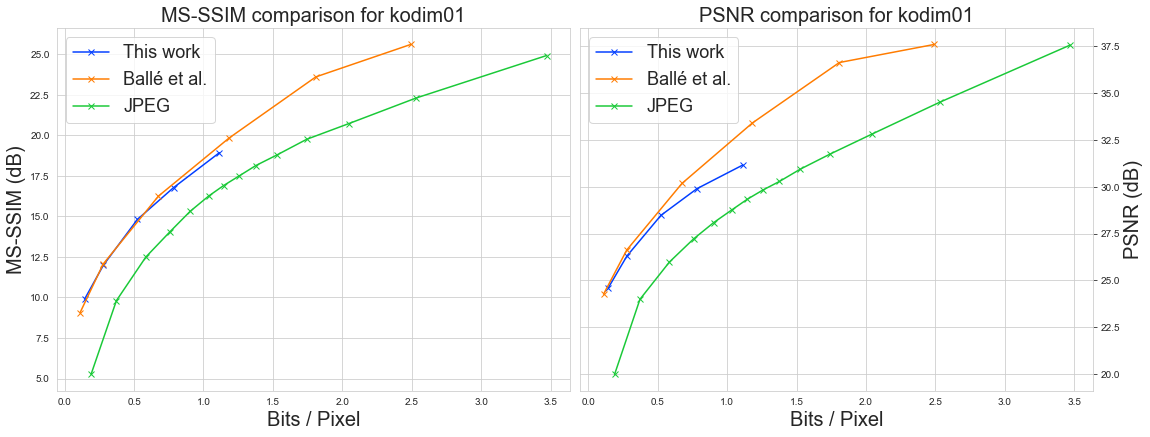

/scratch/gf332/compression_venv/lib/python3.5/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/scratch/gf332/compression_venv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


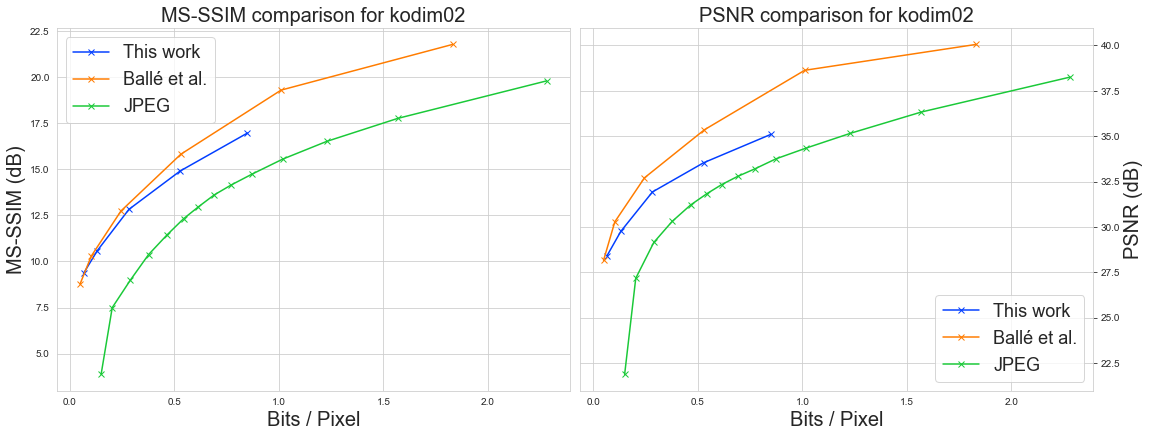

/scratch/gf332/compression_venv/lib/python3.5/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/scratch/gf332/compression_venv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


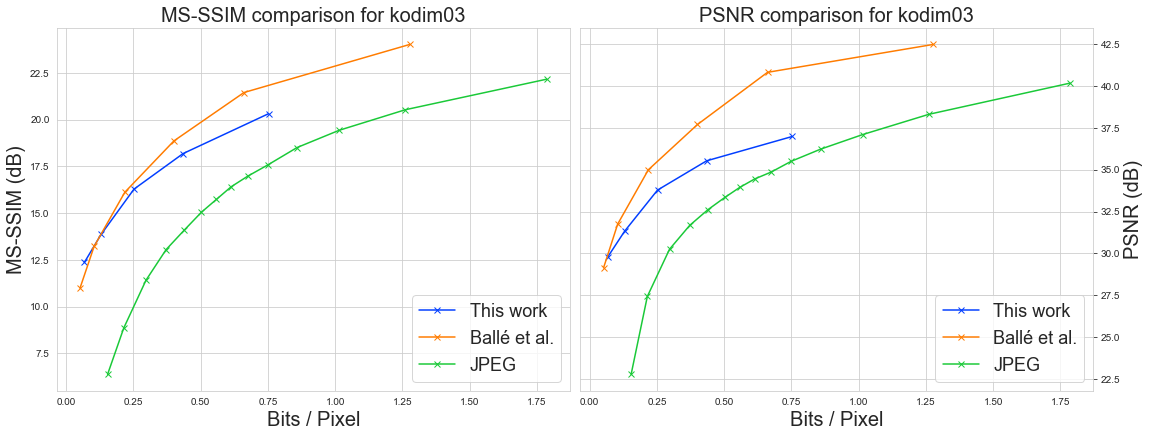

/scratch/gf332/compression_venv/lib/python3.5/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/scratch/gf332/compression_venv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


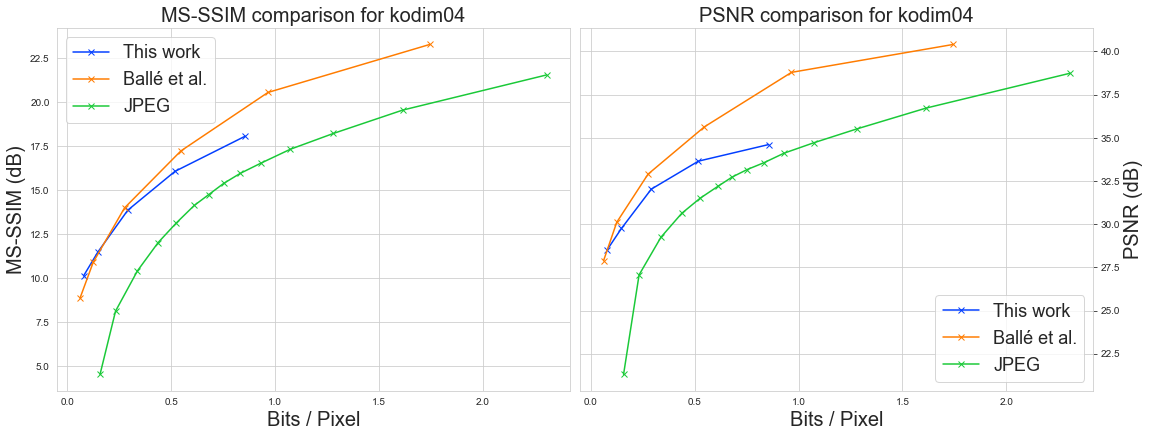

/scratch/gf332/compression_venv/lib/python3.5/site-packages/pandas/core/indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/scratch/gf332/compression_venv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


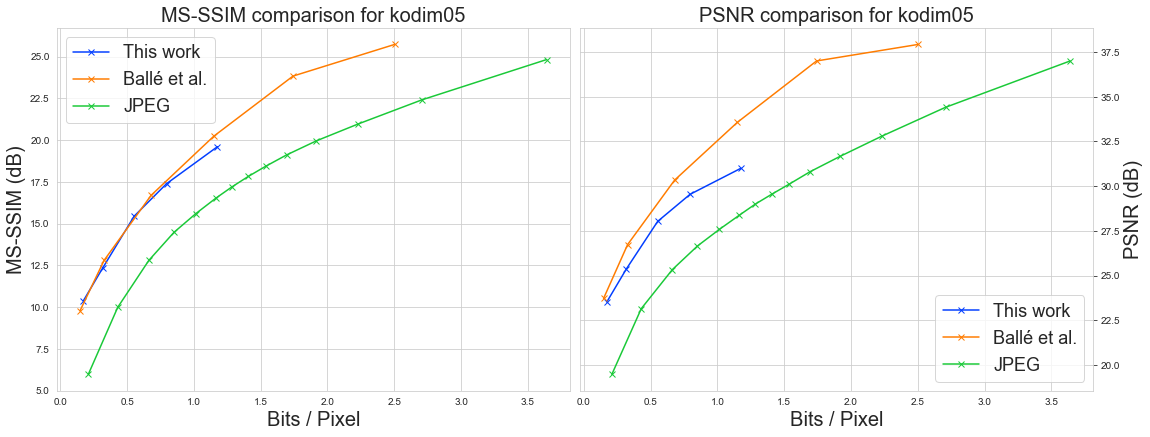

In [7]:
gen_plots(which=["comparison"], 
          n_images=5, 
          show=True,
          side_by_side=True,
          print_table=False,
          title_fontsize=20,
          label_fontsize=20,
          legend_fontsize=18)

In [72]:
from glob import glob

In [ ]:
im_list = glob("/scratch/gf332/datasets/miracle_image_compression/train/*.png")

for path in im_list:
    plt.imshow(plt.imread(path))
    plt.show()